In [54]:
import anxcor.filters as filt_ops
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [55]:
data = np.ones(1000000)
data[1:]=0

In [72]:
filtered_response = filt_ops.butter_bandpass_filter(data,lower_frequency=1/50,upper_frequency=1/15,sample_rate=10,order=1)
filtered_array    = filt_ops.taper(filtered_response,taper=0.1)

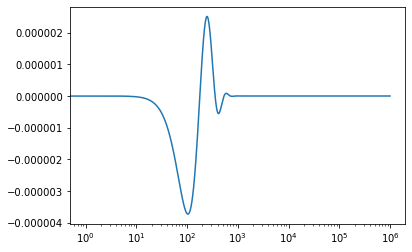

In [73]:
plt.semilogx(filtered_array)

In [74]:
dataarray = xr.DataArray(filtered_array,dims=['time'])

In [75]:
rolled_data = dataarray.rolling(time=100,min_periods=1).mean()

(0, 10000)

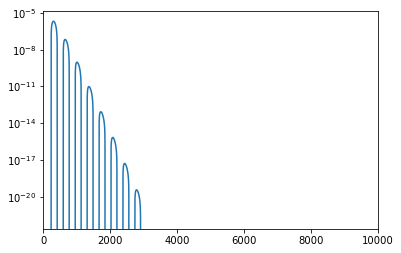

In [76]:
plt.semilogy(rolled_data.data)
plt.xlim([0,10000])

(0, 10000)

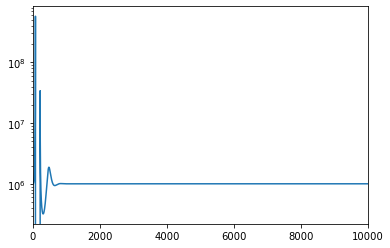

In [77]:
plt.semilogy(1.0/(rolled_data.data+0.000001))
plt.xlim([0,10000])